 Linear Regression

Let's use a simple dataset: Predict student scores based on study hours.¶
Simple/Univariate linear regression model: y_pred = wx + b

where:

y_pred is the value predicted by the model
w is the weight, b is the bias (model parameters)
x is the feature
Multiple linear regression model: y_pred = w1.x1 + w2.x2 + w3.x3 + ....+wn.xn + b

where:

y_pred is the value predicted by the model
x1,x2,..,xn are the features
w1,w2,....,wn are the weights
b is the bias

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Set style
sns.set(style="whitegrid")

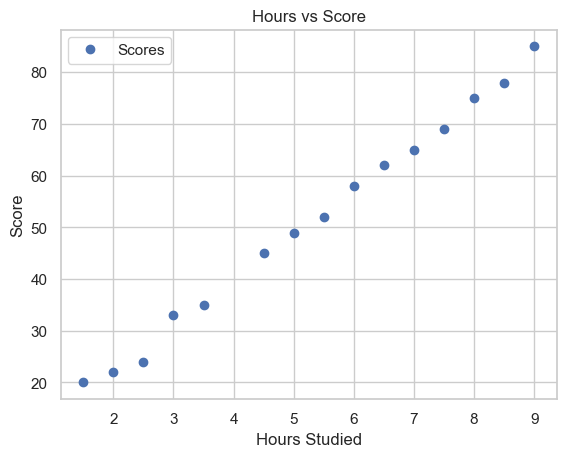

In [4]:
# Create Dataset
# scores are out of hundred
data = {
    'Hours': [1.5, 2.0, 2.5, 3.0, 3.5, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0],
    'Scores': [20, 22, 24, 33, 35, 45, 49, 52, 58, 62, 65, 69, 75, 78, 85]
}
df = pd.DataFrame(data)

# Visualize
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

# Split data
X = df[['Hours']]
y = df['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred = lin_reg.predict(X_test)

Evaluation Metrics: MAE, MSE, and R² Score¶
🧮 1. Mean Absolute Error (MAE)
Formula: MAE = (1/n) * Σ|yᵢ - ŷᵢ|

Where:

yᵢ = Actual value
ŷᵢ = Predicted value
n = Number of samples
Interpretation:

MAE calculates the average of the absolute errors, providing a straightforward measure of model performance.
It's in the same units as the target variable, making it easy to interpret.
When to use:

MAE is preferred when you want to minimize the impact of outliers. Since it does not square the errors, it is less sensitive to larger errors compared to MSE.
 2. Mean Squared Error (MSE)¶
Formula: MSE = (1/n) * Σ(yᵢ - ŷᵢ)²

Where:

yᵢ = Actual value
ŷᵢ = Predicted value
n = Number of samples
Interpretation:

MSE penalizes large errors more heavily because the differences are squared.
A lower MSE value indicates a better fit of the model to the data.
However, since it squares the errors, the units of MSE are the square of the target variable, which can make interpretation less straightforward.
When to use:

MSE is preferred when you want to punish large errors more. It's useful when the application has significant costs associated with large errors, such as in financial models or when high accuracy is critical.
3. R² Score (Coefficient of Determination)¶
Formula: R² = 1 - (SS_res / SS_tot)

Where:

SS_res = Sum of squared residuals, i.e., Σ(yᵢ - ŷᵢ)²
SS_tot = Total sum of squares, i.e., Σ(yᵢ - ȳ)², where ȳ is the mean of actual values.
Interpretation:

R² represents how much of the variance in the target variable is explained by the model.
R² = 1: The model perfectly predicts the target.
R² = 0: The model does no better than predicting the mean value of the target.
Negative R²: The model performs worse than just predicting the mean.
When to use:

R² is best used when you want to measure how much of the variability in the target variable your model is capturing. It's a good general indicator of model performance, especially in linear regression models.
 When to Use Each Metric?¶
MAE: Use when you want a metric that is easy to interpret and resistant to outliers. It gives you the average error, making it a good choice for situations where each error has equal importance.

MSE: Use when you want to penalize large errors more. It’s ideal when large errors are particularly undesirable and need to be corrected. However, it’s less intuitive due to the squared units.

R²: Use when you want a single value that shows how well your model explains the variance in the target variable. It's useful for linear models, but not recommended when comparing models with different numbers of features or when the data has high variance.

In [3]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 1.424242424242428
Mean Squared Error: 2.784830554061332
R2 Score: 0.9940523315171922


What is the Cost Function?¶
=========================
The cost function measures how bad our model's predictions are compared to the actual results. For Linear Regression, we use Mean Squared Error (MSE):

Cost = J = (1/n) * sum( (y_pred - y_true)^2 )

J = (1/n) * sum( (wx+b) - (y_true)^2)

The goal is to minimize this cost!

What is Gradient Descent?¶
=========================
Gradient Descent is an optimization algorithm. It adjusts model parameters (like weights) to minimize the cost function step-by-step.

Imagine trying to find the bottom of a valley (lowest error) by taking small steps downhill.

The update rule for parameters ( \theta ) is:

θ := θ - α * (∂J(θ)/∂θ)
Where:

θ = model parameters (like weights or biases (w and b in this case))
α = learning rate (controls step size)
J(θ) = cost function
∂J(θ)/∂θ = derivative of the cost with respect to θ